In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_blobs
from pathlib import Path

import os
import glob2

In [23]:
p = 3
k = 7
part_m = 'c'
inst_name = 'd198'

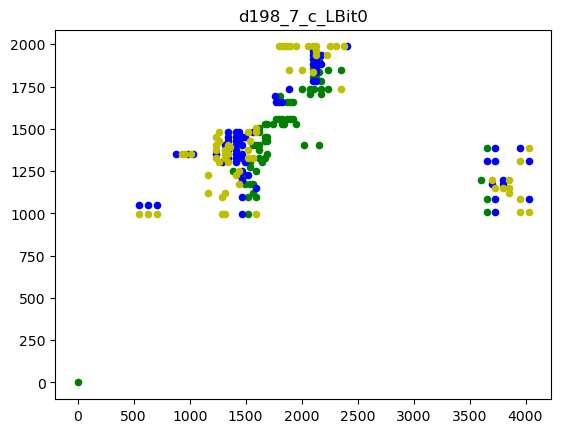

Done!


In [24]:
result_path = os.getcwd() + '\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
color_map = ["r", "g", "b", "y", "m", "o", "w", "c", "v"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if ("LBit" in str(file)) and (("_" + part_m) in str(file)):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=4).astype(int)
            n = point.shape[0]
            for p in np.unique(part):
                j = np.where(part == p)
                plt.scatter(data[j,0], data[j,1], s=20, c=color_map[p], label=p)
            file = Path(file).stem
            plt.title(file)
            # plt.legend(np.unique(part))
            plt.savefig(file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'o'

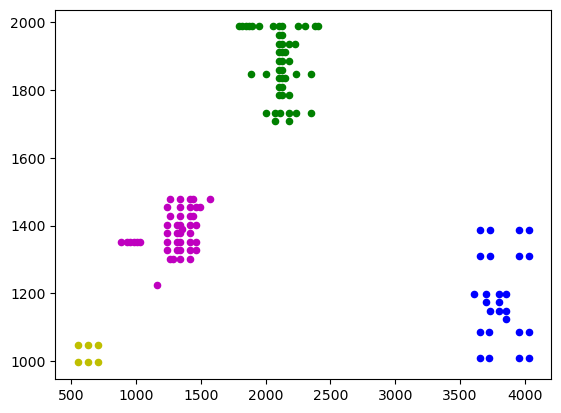

In [25]:
result_path = os.getcwd() + '\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
color_map = ["r", "g", "b", "y", "m", "o", "w", "c", "v"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if "UBit" in str(file):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=4).astype(int)
            n = point.shape[0]
            for k in np.unique(cls):
                j = np.where(cls == k)
                plt.scatter(data[j,0], data[j,1], s=20, c=color_map[k], label=k)
            file = Path(file).stem
            plt.title(file)
            plt.legend(title="Clusters")
            plt.savefig(file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')